# Social_Network_Ads

# Problem Statement-

Read readme file for this

1.   Problem Statement
2.   Data
3.   Goal
4.   Methods



In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Importing Libraries and Data File

In [ ]:
# Linear Algebra
import numpy as np

# Data preprocessing
import pandas as pd

# Libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Feature Scaling
from sklearn.preprocessing import StandardScaler

# Train and Test Split
from sklearn.model_selection import train_test_split

# Classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, recall_score, precision_score


In [ ]:
df  = pd.read_csv('/content/drive/MyDrive/Machine Learning/ML Project/Social_Network_Ads .csv')

Dataset Analysis

In [ ]:
print('Number of rows = ',df.shape[0], '\nNumber of columns = ', df.shape[1])

Number of rows =  400 
Number of columns =  5


In [ ]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [ ]:
df.head().style.background_gradient(cmap='coolwarm')

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.describe().T.style.background_gradient(cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
User ID,400.000000,15691539.757500,71658.321581,15566689.000000,15626763.750000,15694341.500000,15750363.000000,15815236.000000
Age,400.000000,37.655000,10.482877,18.000000,29.750000,37.000000,46.000000,60.000000
EstimatedSalary,400.000000,69742.500000,34096.960282,15000.000000,43000.000000,70000.000000,88000.000000,150000.000000
Purchased,400.000000,0.357500,0.479864,0.000000,0.000000,0.000000,1.000000,1.000000


In [ ]:
df.duplicated().sum()

0

Missing Value Analysis

In [ ]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

HeatMap

<Axes: >

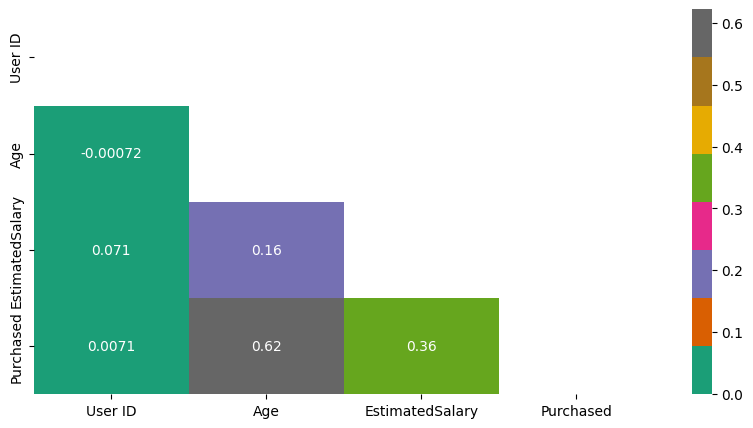

In [ ]:
numeric_df = df.select_dtypes(include=np.number)
plt.figure(figsize=(10,5))

mask = np.triu(np.ones_like(numeric_df.corr(),dtype=bool))
sns.heatmap(numeric_df.corr(), mask=mask, annot=True, cmap='Dark2')

In [ ]:
correlation = pd.DataFrame(numeric_df.corr().Purchased)
correlation

,Purchased
User ID,0.007120
Age,0.622454
EstimatedSalary,0.362083
Purchased,1.000000


In [ ]:
df.drop('User ID', axis=1,inplace=True)

Analysis and Visualization of Target

In [ ]:
df['Purchased'].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

<ipython-input-73-41397f244073>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Purchased', data=df, palette='Dark2' )


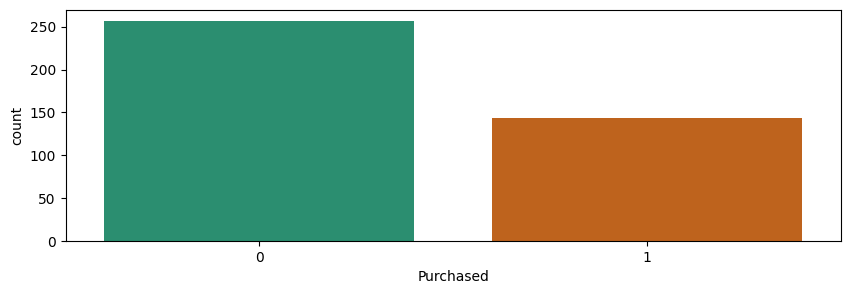

In [ ]:
plt.figure(figsize=(10,3))
sns.countplot(x = 'Purchased', data=df, palette='Dark2' )
plt.show()

From above visualizations it is clear that number of customers purchased from social networking advertisement is far less than total customers viewed the advertisement.

**Visualization and Statistical Analysis of Target with respect to gender**

<ipython-input-74-b8475fe22fab>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x = 'Purchased', col='Gender', kind='count', data=df,palette='Dark2');


<Figure size 1000x300 with 0 Axes>

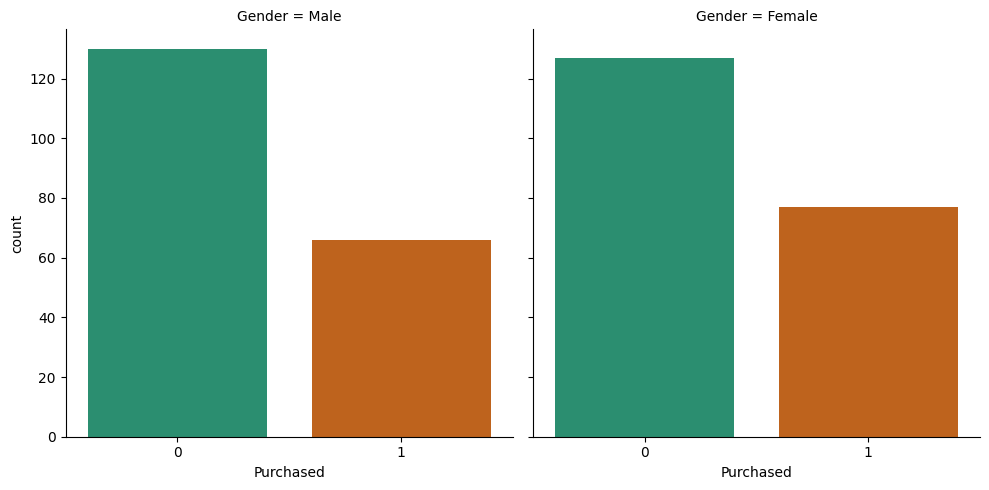

In [ ]:
plt.figure(figsize=(10,3))
sns.catplot(x = 'Purchased', col='Gender', kind='count', data=df,palette='Dark2');
plt.show()

In [ ]:
pd.crosstab(df.Gender,df.Purchased,normalize = 'index').style.background_gradient(cmap='crest')

Purchased,0,1
Gender,,
Female,0.622549,0.377451
Male,0.663265,0.336735


37.7% of female customers have purchased a product from social networking advertisement where as only 33.67%  of male customers purchased from social networking advertisement.

Distribution and Visualization of Age and Estimated Salary

<Axes: xlabel='Age', ylabel='Count'>

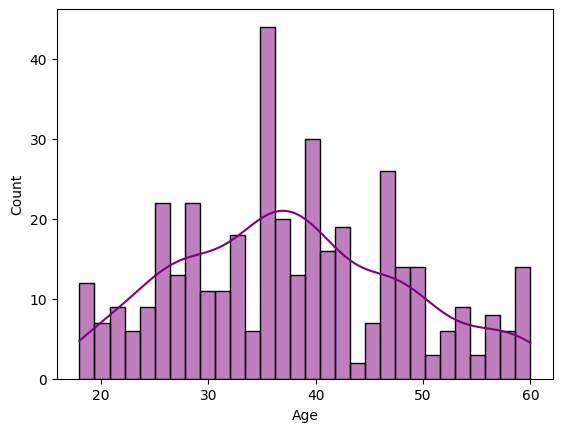

In [ ]:
sns.histplot(df['Age'],kde=True,color='purple',bins=30)


<Axes: xlabel='EstimatedSalary', ylabel='Count'>

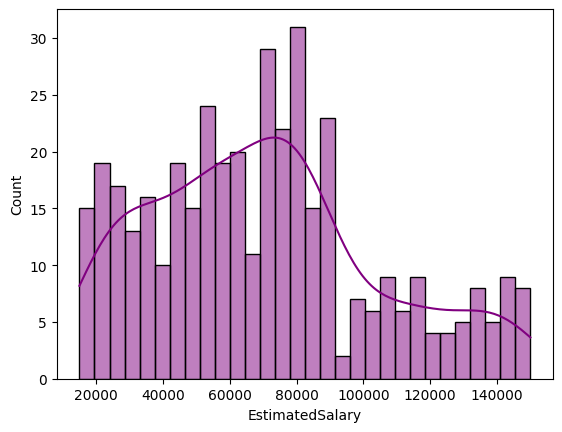

In [ ]:
sns.histplot(df['EstimatedSalary'],kde=True,color='purple',bins=30)

Skew is towards age group 35-38 and Estimated salary skew is towards 70k to 90k





**Pair Plot of Age and Estimated Salary with Target**

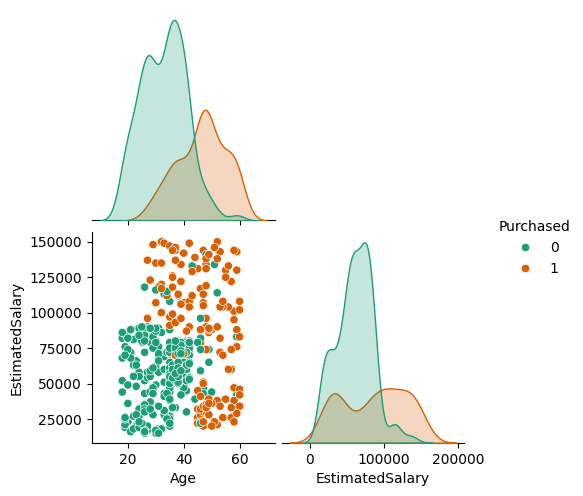

In [ ]:
sns.pairplot(df, hue='Purchased', palette='Dark2', corner=True)

**Scatter Plot of Age and Estimated Salary with respect to Target**

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

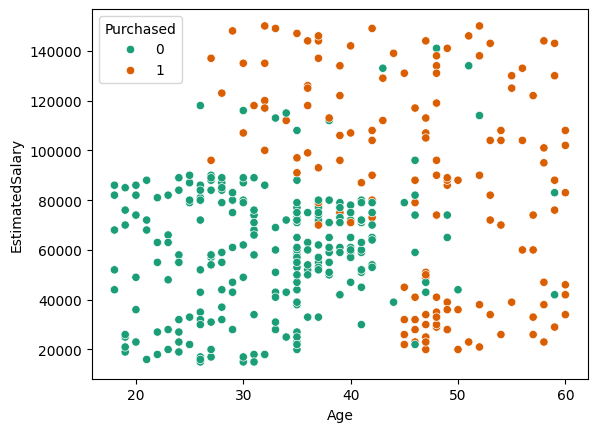

In [ ]:
sns.scatterplot(x = 'Age', y = 'EstimatedSalary', data = df, hue = 'Purchased', palette = 'Dark2')

From PairPlot and ScatterPlot it is clear that if scaling is not done, Estimated Salary will Dominate Age, which will result in biased model,
Feature Scaling will be done after splitting the model into training and test set

**Encoding Categorical Data**

Column Gender contains categorical variables, it should be encoded before building the model

In [ ]:
df = pd.get_dummies(df,columns = ['Gender'],drop_first = True)

In [ ]:
df.head()

,Age,EstimatedSalary,Purchased,Gender_Male
0,19,19000,0,True
1,35,20000,0,True
2,26,43000,0,False
3,27,57000,0,False
4,19,76000,0,True


**Splitting Dataset**

In [ ]:
X = df.drop(['Purchased'],axis = 1)
y = df['Purchased']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

**Feature Scaling**

In [ ]:
cols = X_train.columns

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = pd.DataFrame(X_train, columns=cols)
X_test = pd.DataFrame(X_test, columns=cols)

In [ ]:
X_train.head()
X_test.head()

,Age,EstimatedSalary,Gender_Male
0,-0.804802,0.504964,1.020204
1,-0.012544,-0.567782,-0.980196
2,-0.309641,0.157046,1.020204
3,-0.804802,0.273019,-0.980196
4,-0.309641,-0.567782,-0.980196


K Nearest Neighbor(KNN)

In [ ]:
classifierKNN  = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifierKNN.fit (X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred = classifierKNN.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1])

# **Evaluation of KNN Classifier**

**Confusion Matrix**

In [ ]:
cm1 = confusion_matrix(y_test,y_pred)
print(cm1)

[[64  4]
 [ 3 29]]


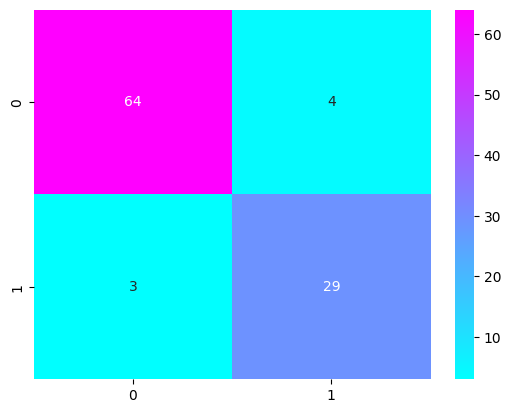

In [ ]:
sns.heatmap(cm1, annot=True, fmt='d', cmap='cool')
plt.show()

Out of 100 only 7 is wrongly predicted

# Classification Report

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



Overall Accuracy is 93% and Precision, Recall and F1-Score for predicting not purchased category is above 94% and for purchased category is close to 90%

# Choosing a K Value

In [ ]:
error_rate = []

for i in range(1,40):

  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

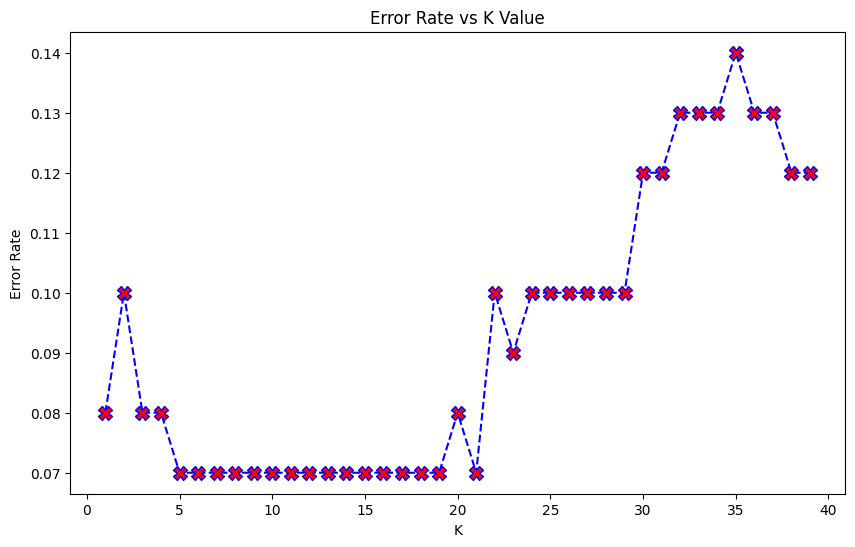

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate,color='blue', linestyle='dashed', marker = 'X',
markerfacecolor='red', markersize=10)

plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')



From the plot it is clear from K=5 to  K = 18 the error rate is lowest and k=35 error rate is maximum

WITH K=10


[[64  4]
 [ 3 29]]


              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100





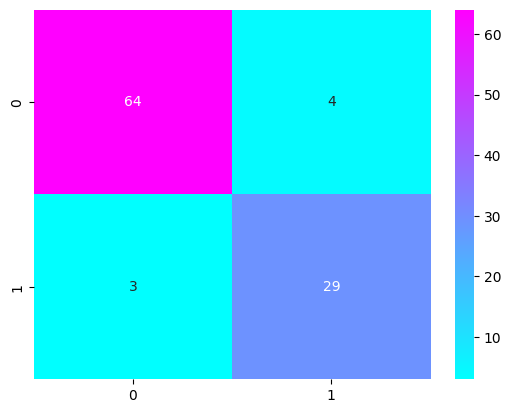

In [ ]:
knn1 = KNeighborsClassifier(n_neighbors=10)

knn1.fit(X_train,y_train)
pred1 = knn1.predict(X_test)

print('WITH K=10')
print('\n')
print(confusion_matrix(y_test,pred1))
sns.heatmap(confusion_matrix(y_test,pred1), annot=True, fmt='d', cmap='cool')
print('\n')
print(classification_report(y_test,pred1))
print('\n')

K=5 and K=10  is having the same Accuracy, Precision, recall, F1-score. It is the same predicted from the plot of error rate vs K value that K with 5 to 10 will have same result

WITH K=35


[[65  3]
 [11 21]]


              precision    recall  f1-score   support

           0       0.86      0.96      0.90        68
           1       0.88      0.66      0.75        32

    accuracy                           0.86       100
   macro avg       0.87      0.81      0.83       100
weighted avg       0.86      0.86      0.85       100





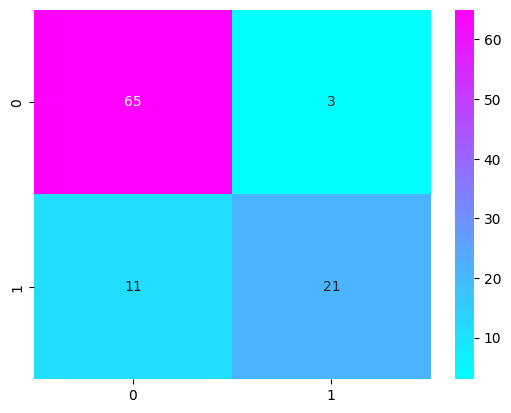

In [ ]:
knn2 = KNeighborsClassifier(n_neighbors=35)

knn2.fit(X_train,y_train)
pred2 = knn2.predict(X_test)

print('WITH K=35')
print('\n')
print(confusion_matrix(y_test,pred2))
sns.heatmap(confusion_matrix(y_test,pred2), annot=True, fmt='d', cmap='cool')
print('\n')
print(classification_report(y_test,pred2))
print('\n')

With K = 35, out of 100, 14 predictions are wrong and accuracy decreased to 86%. Also recall from purchased category has gone down to 66%. It clearly states if the K value is large, KNN does not perform efficiently.

# Support Vector Machine (SVM)

# Hyperplane

# SVM Kernel

# SVM with Linear Kernel

In [ ]:
classifierLin = SVC(kernel = 'linear')
classifierLin.fit(X_train, y_train)

SVC(kernel='linear')

Default value of gamma is scale and default value of C parameter is 1

In [ ]:
classifierLin.gamma

'scale'

In [ ]:
classifierLin.C

1.0

In [ ]:
y_pred_svc = classifierLin.predict(X_test)

In [ ]:
y_pred_svc

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

# Evalution of SVM with Linear Kernel

Confusion Matrix

In [ ]:
cm2 = confusion_matrix(y_test, y_pred_svc)
print(cm2)

[[66  2]
 [ 9 23]]


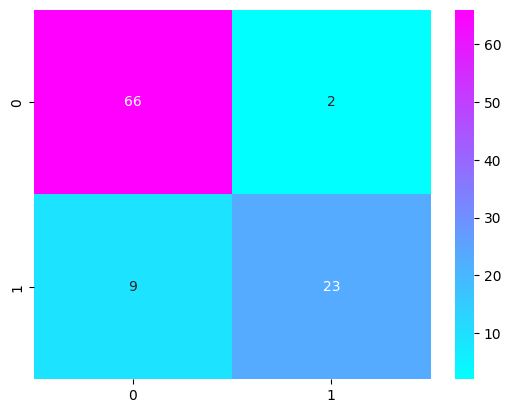

In [ ]:
sns.heatmap(cm2, annot=True, fmt='d', cmap='cool')
plt.show()

Out of 100, 11 are wrongly predicted.

# Classification Report

In [ ]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92        68
           1       0.92      0.72      0.81        32

    accuracy                           0.89       100
   macro avg       0.90      0.84      0.87       100
weighted avg       0.89      0.89      0.89       100



Accuracy is 89% but recall for purchased is only 72%.

# SVM with Kernel Radial Basis Function

In [ ]:
classifierrbf = SVC(kernel = 'rbf')
classifierrbf.fit(X_train, y_train)

SVC()

In [ ]:
classifierrbf.C

1.0

In [ ]:
classifierrbf.gamma

'scale'

In [ ]:
y_pred_rbf = classifierrbf.predict(X_test)
y_pred_rbf

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1])

# Evalution of SVM with RBF Kernel

In [ ]:
cm3 = confusion_matrix(y_test, y_pred_rbf)
print(cm3)

[[64  4]
 [ 3 29]]


Out of 100, only 7 is wrongly predicted

In [ ]:
print(classification_report(y_test,y_pred_rbf))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



Overall Accuracy is 93% and Precision, Recall and F1-score for predicting not purchased category is above 94% and for purchased category is close to 90%

#  HyperParameter Tuning

# GridSearch

In [ ]:
g =GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'gamma': [1,0.1,0.01,0.001,0.0001,1.1,1.2],'kernel': ('linear', 'rbf')})

In [ ]:
g.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 1.1, 1.2],
                         'kernel': ('linear', 'rbf')})

The Grid search gives a combination of values which have the highest accuracy among all the values

In [ ]:
g.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

Best Parameter for SVM is Kernel rbf with gamma =1 and C =1.

In [ ]:
g.best_estimator_

SVC(C=1, gamma=1)

In [ ]:
grid_pred = g.predict(X_test)

# Evalution with Grid Search

Confusion Matrix

In [ ]:
print(confusion_matrix(y_test,grid_pred))

[[64  4]
 [ 3 29]]


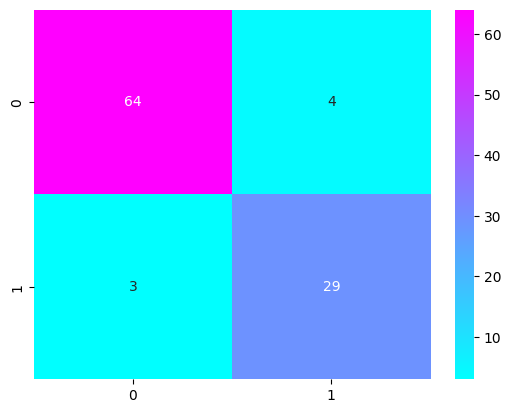

In [ ]:
sns.heatmap(confusion_matrix(y_test,grid_pred), annot=True, fmt='d', cmap='cool')
plt.show()

Out of 100, only 7 is wrongly predicted

# Classification Report

In [ ]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



Overall Accuracy is 93% and Precision, Recall and F1-score for predicting not purchased category is above 94% and for purchased category is close to 90%

# Conclusion



*   Number customers purchased through social networking advertisment is far less that total customers viewed the advertisement.

*   37.74% of female customers have purchased a product through social networking advertisment where as only 33.67% of male customers purchased through social networking advertisment.

*   For KNN, K =5 to K =18 have least error rate and K= 35 has maximum error rate
*   Best Parameter for SVM is Kernel rbf with gamma =1 and C =1.

*   KNN with least error rate and SVM with best optimisation parameter have
       overall:
       Accuracy 93%
*  Precision, Recall and F1-score for predicting not purchased category is  
   above 94%
*   Precision, Recall and F1-score for predicting purchased category is close to 90%














